# Analysis of the Chunked Phenotype Datasets

Some Background ... the original phenotypes datasets is missing a lot of phenotypes for a lot of rat. In fact, the data appears chunked with some chunks of rats having data for some chunks of phenotypes.  I built phenotype data chunks to have datasets that try to maximize rat samples per phenotype set.  The phenotypes we care about most are those with "loco" in the name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load in locomotor phenotype datasets

In [2]:
loco = pd.read_csv("pheno_loco.txt", sep = '\t')
loco.shape

(2490, 35)

In [3]:
locomotor = pd.read_csv("pheno_locomotor.txt", sep = '\t')
locomotor.shape

(631, 22)

In [4]:
locomotion = pd.read_csv("pheno_locomotion.txt", sep = '\t')
locomotion.shape

(457, 9)

### Load in miscalaneous phenotype dataset

In [5]:
misc = pd.read_csv("pheno_misc1.txt", sep = '\t')
misc.shape

(2490, 227)

## (1) Analyze loco and misc dataset because they are bigger

### Loco dataset ...

In [6]:
loco = loco.dropna()
loco.shape

(2489, 35)

In [7]:
loco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2489 entries, 0 to 2489
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rfid           2489 non-null   object 
 1   loco_maxcent   2489 non-null   float64
 2   loco_cent16_5  2489 non-null   float64
 3   loco_cent13_5  2489 non-null   float64
 4   loco_cent10_5  2489 non-null   float64
 5   loco_cent7_5   2489 non-null   float64
 6   loco_cent4_5   2489 non-null   float64
 7   loco_cent1_5   2489 non-null   float64
 8   loco_maxrear   2489 non-null   float64
 9   loco_rear16_5  2489 non-null   float64
 10  loco_rear13_5  2489 non-null   float64
 11  loco_rear10_5  2489 non-null   float64
 12  loco_rear7_5   2489 non-null   float64
 13  loco_rear4_5   2489 non-null   float64
 14  loco_rear1_5   2489 non-null   float64
 15  loco_maxdis    2489 non-null   float64
 16  loco_dis16_5   2489 non-null   float64
 17  loco_dis13_5   2489 non-null   float64
 18  loco_dis

Drop the 'loco_box_id' column since not a float and make the rfid column the index

In [8]:
loco = loco.drop(columns = ['loco_box_id'])
loco = loco.set_index('rfid')
loco.head()

,loco_maxcent,loco_cent16_5,loco_cent13_5,loco_cent10_5,loco_cent7_5,loco_cent4_5,loco_cent1_5,loco_maxrear,loco_rear16_5,loco_rear13_5,...,loco_act13_5,loco_act10_5,loco_act7_5,loco_act4_5,loco_act1_5,loco_center,loco_rear,loco_distance,loco_activity,loco_age
rfid,,,,,,,,,,,,,,,,,,,,,
00077E61F3,171.3,171.3,59.4,83.9,84.8,55.0,49.7,19.0,17.0,9.0,...,81.0,79.0,78.0,85.0,109.0,504.1,86.0,2367.0,470.0,73.0
00077E6207,115.4,40.8,115.4,12.4,7.9,80.9,45.5,26.0,10.0,3.0,...,65.0,54.0,74.0,100.0,135.0,302.9,69.0,2407.0,477.0,73.0
00077E6232,48.1,32.9,28.0,48.1,33.1,37.2,29.0,20.0,10.0,6.0,...,73.0,81.0,86.0,94.0,124.0,208.3,66.0,2690.0,527.0,77.0
00077E6239,147.1,128.2,88.7,147.1,118.0,127.8,109.0,25.0,0.0,0.0,...,25.0,65.0,72.0,85.0,97.0,718.8,55.0,1536.0,371.0,81.0
00077E62D2,89.4,0.0,0.0,0.0,7.4,89.4,12.0,22.0,0.0,0.0,...,29.0,42.0,59.0,88.0,96.0,108.8,40.0,1775.0,352.0,77.0


Summary statistics ...

In [9]:
loco.describe()

,loco_maxcent,loco_cent16_5,loco_cent13_5,loco_cent10_5,loco_cent7_5,loco_cent4_5,loco_cent1_5,loco_maxrear,loco_rear16_5,loco_rear13_5,...,loco_act13_5,loco_act10_5,loco_act7_5,loco_act4_5,loco_act1_5,loco_center,loco_rear,loco_distance,loco_activity,loco_age
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,...,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000
mean,72.470510,32.222579,35.299598,36.707473,39.083447,42.220289,39.703978,31.280836,5.510245,6.324227,...,48.064283,53.231820,60.369225,68.267577,89.988349,225.237364,76.200080,2088.677782,363.351949,63.521896
std,39.999423,39.804341,39.140706,37.564565,33.354689,29.931745,18.390266,7.233216,5.815491,5.784979,...,20.941540,20.275328,19.615411,18.881312,18.873848,140.940888,26.700617,533.906037,89.536866,9.971242
min,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.900000,6.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,33.000000,6.400000,15.000000,724.000000,125.000000,43.000000
25%,42.300000,2.300000,6.300000,9.400000,15.100000,20.800000,27.200000,26.000000,0.000000,1.000000,...,34.000000,40.000000,47.000000,55.000000,77.000000,122.500000,56.000000,1702.000000,300.000000,55.000000
50%,61.800000,17.900000,22.000000,25.100000,30.900000,35.500000,36.700000,31.000000,4.000000,5.000000,...,47.000000,52.000000,58.000000,66.000000,88.000000,193.200000,74.000000,2038.000000,352.000000,63.000000
75%,93.900000,45.600000,50.700000,51.600000,53.300000,57.100000,49.300000,36.000000,9.000000,10.000000,...,60.000000,65.000000,71.000000,79.000000,102.000000,293.300000,93.000000,2426.000000,414.000000,72.000000
max,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,141.000000,65.000000,44.000000,44.000000,...,155.000000,142.000000,136.000000,155.000000,183.000000,920.000000,191.000000,4190.000000,860.000000,88.000000


Correlation heatmap for the loco phenotype ...

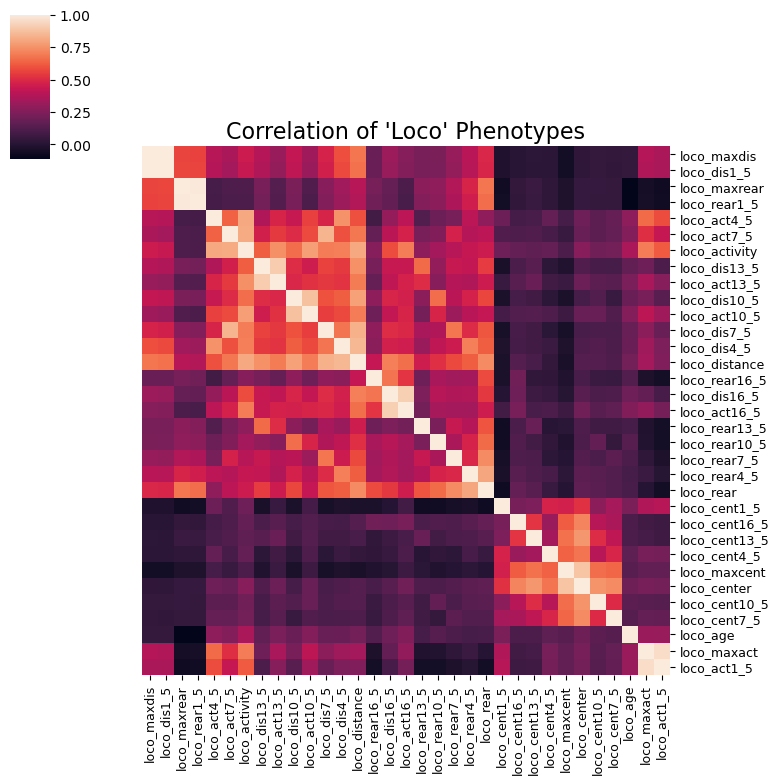

In [14]:
# calculate the correlation matrix
corr = loco.corr()

# plot the heatmap 
g = sns.clustermap(corr, figsize = (8,8), xticklabels=corr.columns, yticklabels=corr.columns)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 9, rotation = 90)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 9)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_heatmap.set_title("Correlation of 'Loco' Phenotypes", fontsize = 16)
plt.savefig('loco_phenotypes_correlation.jpeg', bbox_inches = 'tight', dpi = 200)
plt.show()

### Misc Dataset ...

First, remove the loco columns from the previous dataset

In [83]:
misc = misc.drop(columns = loco.columns)
misc.shape

(2490, 194)

In [84]:
misc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Columns: 194 entries, rfid to rt_box_id
dtypes: float64(186), object(8)
memory usage: 3.7+ MB


In [85]:
misc = misc.set_index('rfid')
misc.head()

,dd_pcd0,dd_idpt0,dd_idpt600,dd_idpt1200,dd_idpt1800,dd_idpt2400,dd_idptmax,dd_idptauc,dd_tip0,dd_tip600,...,rt_popint1_5,rt_popint4_5,rt_popint7_5,rt_popint10_5,rt_popint13_5,rt_popint16_5,rt_peropinit_max,rt_peropinit_slope,rt_age,rt_box_id
rfid,,,,,,,,,,,,,,,,,,,,,
00077E61F3,2.595,105.900000,90.041667,94.888889,69.523810,57.444444,105.900000,0.693567,9.36,21.13,...,1.125000,1.303030,1.190476,1.400000,1.333333,0.347826,1.400000,-0.034147,115.0,B5
00077E6207,2.180,106.838710,102.307692,96.350000,79.500000,59.789474,106.838710,0.757020,12.64,17.64,...,1.000000,1.340426,1.000000,1.203125,1.173913,0.750000,1.340426,-0.014728,147.0,B7
00077E6232,3.120,103.517241,73.047619,55.666667,62.700000,63.400000,103.517241,0.553091,10.79,24.54,...,2.222222,2.923077,2.666667,1.263158,1.375000,0.666667,2.923077,-0.131672,120.0,A7
00077E6239,3.130,118.571429,86.500000,98.333333,79.500000,89.458333,118.571429,0.663942,7.79,20.95,...,2.133333,2.934426,2.181818,1.680851,2.677419,3.421053,3.421053,0.049206,132.0,B01
00077E62D2,2.440,128.439024,98.555556,78.272727,75.952381,70.000000,128.439024,0.595431,3.94,22.35,...,1.222222,1.058824,0.563636,0.390244,0.641026,0.750000,1.222222,-0.036075,120.0,B1


Only keep data with float columns

In [86]:
misc = misc.select_dtypes(['number'])
misc.shape

(2490, 186)

In [87]:
misc = misc.dropna()
misc.shape

(2410, 186)

In [88]:
list(misc.columns)

['dd_pcd0',
 'dd_idpt0',
 'dd_idpt600',
 'dd_idpt1200',
 'dd_idpt1800',
 'dd_idpt2400',
 'dd_idptmax',
 'dd_idptauc',
 'dd_tip0',
 'dd_tip600',
 'dd_tip1200',
 'dd_tip1800',
 'dd_tip2400',
 'dd_tipmax',
 'dd_tipauc',
 'dd_pc0',
 'dd_pc600',
 'dd_pc1200',
 'dd_pc1800',
 'dd_pc2400',
 'dd_tw0',
 'dd_tw600',
 'dd_tw1200',
 'dd_tw1800',
 'dd_tw2400',
 'dd_sess0',
 'dd_sess600',
 'dd_sess1200',
 'dd_sess1800',
 'dd_sess2400',
 'dd_rf0',
 'dd_rf600',
 'dd_rf1200',
 'dd_rf1800',
 'dd_rf2400',
 'dd_wrate0',
 'dd_wrate600',
 'dd_wrate1200',
 'dd_wrate1800',
 'dd_wrate2400',
 'dd_pcrate0',
 'dd_pcrate600',
 'dd_pcrate1200',
 'dd_pcrate1800',
 'dd_pcrate2400',
 'dd_pcratemax',
 'dd_pcrateauc',
 'dd_rfrate0',
 'dd_rfrate600',
 'dd_rfrate1200',
 'dd_rfrate1800',
 'dd_rfrate2400',
 'dd_rfrateav',
 'dd_age',
 'lr_px_pre_active',
 'lr_px_pre_inactive',
 'lr_px_pre_total',
 'lr_px_pre_relactive',
 'lr_px_pre_act1_5',
 'lr_px_pre_act4_5',
 'lr_px_pre_act7_5',
 'lr_px_pre_act10_5',
 'lr_px_pre_act13_5',


## (2) Analyze the 'locomotor' datatset, Thiago's recomendation for phenotypes

In [53]:
locomotor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   rfid                                  631 non-null    int64  
 1   locomotor_cage                        630 non-null    float64
 2   locomotor_t1_age                      630 non-null    float64
 3   locomotor_t2_age                      630 non-null    float64
 4   locomotor_t1_total_distance           630 non-null    float64
 5   locomotor_t1_rest_time                630 non-null    float64
 6   locomotor_t1_rest_episode_count       630 non-null    float64
 7   locomotor_t1_movement_episode_count   630 non-null    float64
 8   locomotor_t1_vertical_activity_count  630 non-null    float64
 9   locomotor_t1_center_time_legacy       630 non-null    float64
 10  locomotor_t2_total_distance           630 non-null    float64
 11  locomotor_t2_rest_t

In [54]:
locomotor = locomotor.dropna()
locomotor.shape

(629, 22)

In [58]:
locomotor = locomotor.set_index('rfid')
locomotor.head()

,locomotor_cage,locomotor_t1_age,locomotor_t2_age,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy,locomotor_t2_total_distance,...,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy,locomotor_fecal_boli_box,locomotor_fecal_boli_1,locomotor_fecal_boli_2,locomotor_fecal_boli_change,locomotor_fecal_boli_age_1,locomotor_fecal_boli_age_2
rfid,,,,,,,,,,,,,,,,,,,,,
933000320045751,4.0,76.0,77.0,4058.93,316.15,130.0,139.0,1667.0,221.18,3011.69,...,136.0,143.0,1168.0,63.77,40,1,0.0,-1.0,76,77
933000320045756,4.0,74.0,75.0,1669.60,509.62,141.0,141.0,868.0,10.54,1872.80,...,148.0,152.0,1109.0,15.39,54,0,0.0,0.0,74,75
933000320045757,4.0,74.0,75.0,4554.67,353.01,131.0,139.0,1703.0,151.58,3831.46,...,118.0,126.0,1135.0,54.23,18,0,0.0,0.0,74,75
933000320045759,4.0,76.0,77.0,5350.88,335.55,148.0,157.0,1569.0,110.57,3588.23,...,142.0,151.0,1350.0,93.32,52,0,0.0,0.0,76,77
933000320045760,2.0,76.0,77.0,1829.33,413.79,127.0,134.0,1297.0,454.05,1508.50,...,162.0,164.0,994.0,539.84,39,8,5.0,-3.0,76,77


In [59]:
locomotor.describe()

,locomotor_cage,locomotor_t1_age,locomotor_t2_age,locomotor_t1_total_distance,locomotor_t1_rest_time,locomotor_t1_rest_episode_count,locomotor_t1_movement_episode_count,locomotor_t1_vertical_activity_count,locomotor_t1_center_time_legacy,locomotor_t2_total_distance,...,locomotor_t2_rest_episode_count,locomotor_t2_movement_episode_count,locomotor_t2_vertical_activity_count,locomotor_t2_center_time_legacy,locomotor_fecal_boli_box,locomotor_fecal_boli_1,locomotor_fecal_boli_2,locomotor_fecal_boli_change,locomotor_fecal_boli_age_1,locomotor_fecal_boli_age_2
count,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,...,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,2.494436,90.063593,91.063593,3083.266010,366.743514,137.904610,145.311606,1378.426073,198.426375,2425.019714,...,153.912560,159.659777,1157.585056,143.423291,24.947536,3.160572,2.432432,-0.728140,90.057234,91.057234
std,1.121043,25.760270,25.760270,1142.827297,87.461575,17.230189,16.322044,300.650918,133.111614,1044.645959,...,15.485363,15.429787,308.515308,122.205706,14.559742,2.914051,2.708320,2.732941,25.765106,25.765106
min,1.000000,69.000000,70.000000,463.290000,170.870000,80.000000,80.000000,546.000000,10.540000,33.980000,...,104.000000,113.000000,323.000000,0.000000,1.000000,0.000000,0.000000,-11.000000,69.000000,70.000000
25%,1.000000,76.000000,77.000000,2209.260000,301.960000,127.000000,135.000000,1165.000000,107.200000,1685.230000,...,143.000000,149.000000,958.000000,63.820000,12.000000,0.000000,0.000000,-2.000000,76.000000,77.000000
50%,2.000000,80.000000,81.000000,3037.400000,360.120000,138.000000,145.000000,1359.000000,165.010000,2316.470000,...,154.000000,160.000000,1134.000000,109.240000,24.000000,3.000000,2.000000,0.000000,80.000000,81.000000
75%,3.000000,86.000000,87.000000,3852.050000,426.370000,150.000000,156.000000,1576.000000,247.570000,3057.020000,...,164.000000,170.000000,1330.000000,182.680000,37.000000,5.000000,4.000000,0.000000,86.000000,87.000000
max,4.000000,159.000000,160.000000,7534.190000,671.360000,193.000000,199.000000,2651.000000,745.100000,8411.730000,...,203.000000,211.000000,2531.000000,834.890000,55.000000,12.000000,13.000000,9.000000,159.000000,160.000000


Correlation heatmap for locomotor phenotypes ..

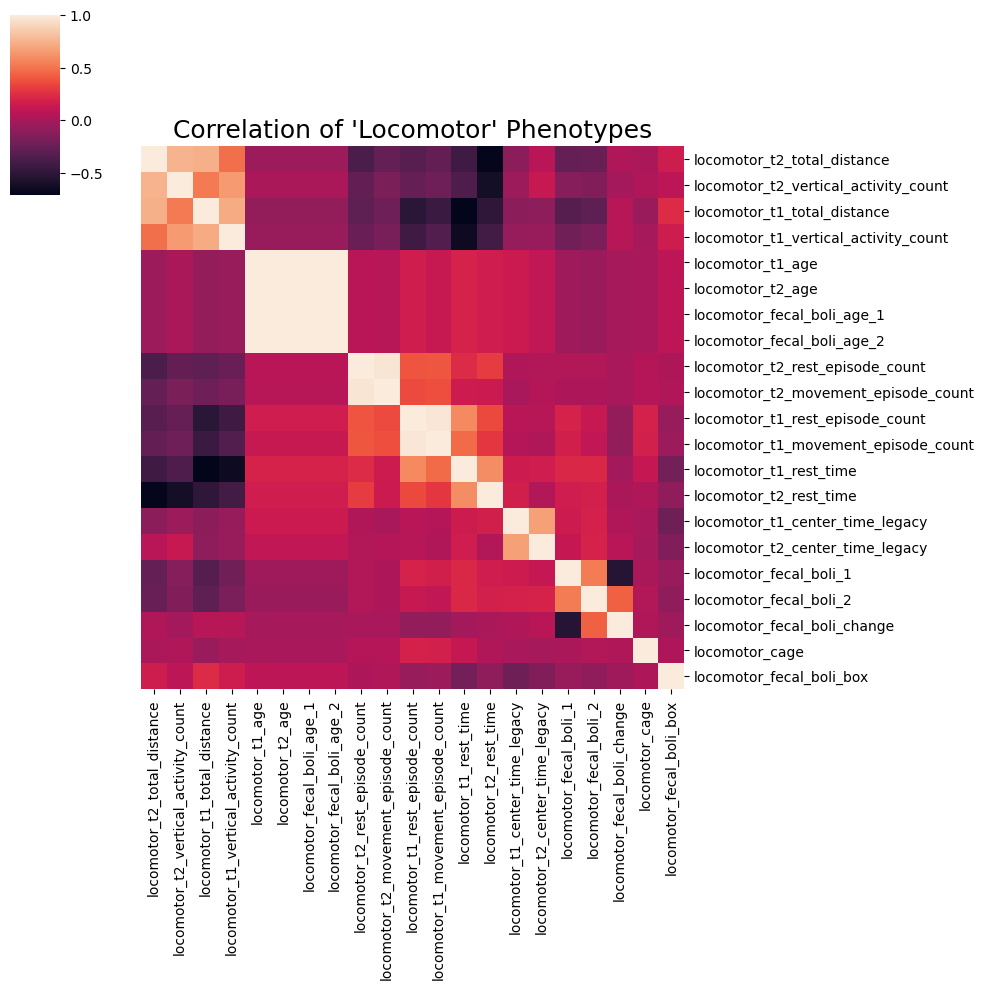

In [61]:
# calculate the correlation matrix
corr = locomotor.corr()

# plot the heatmap 
g = sns.clustermap(corr, figsize = (10,10), xticklabels=corr.columns, yticklabels=corr.columns)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_heatmap.set_title("Correlation of 'Locomotor' Phenotypes", fontsize = 18)
plt.show()

### (3) Analyze 'locomotion' dataset, last and smallest dataset

In [67]:
locomotion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rfid                  457 non-null    object 
 1   sha_01_locomotion     457 non-null    int64  
 2   sha_10_locomotion     456 non-null    float64
 3   sha_tot_locomotion    457 non-null    int64  
 4   inta_01_locomotion    457 non-null    int64  
 5   inta_15_locomotion    457 non-null    int64  
 6   inta_tot_locomotion   457 non-null    int64  
 7   inta_loco_difference  457 non-null    int64  
 8   cue_locomotion        429 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 32.3+ KB


Drop the 'cue_locomotion' dataset since it has a lot more NaNs than the other columns

In [68]:
locomotion = locomotion.drop(columns = ['cue_locomotion'])
locomotion = locomotion.dropna()
locomotion.set_index('rfid')
locomotion.shape

(456, 8)

In [69]:
locomotion.describe()

,sha_01_locomotion,sha_10_locomotion,sha_tot_locomotion,inta_01_locomotion,inta_15_locomotion,inta_tot_locomotion,inta_loco_difference
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,3372.436404,4253.750000,39108.557018,7240.482456,10121.028509,136936.094298,2880.546053
std,2797.723076,3174.677029,25712.286958,5096.254691,6094.197357,79308.813405,4724.703494
min,0.000000,0.000000,3454.000000,137.000000,263.000000,8000.000000,-13433.000000
25%,1352.750000,1666.750000,16569.750000,2710.500000,4972.750000,72100.250000,-140.500000
50%,2548.000000,3577.500000,32894.000000,6477.000000,10227.500000,137589.000000,1945.500000
75%,4535.000000,6224.750000,55378.000000,10701.500000,14335.250000,191655.250000,5601.000000
max,15886.000000,14901.000000,123943.000000,21881.000000,36362.000000,387131.000000,24341.000000


Correlation heatmap for locomation phenotypes ...

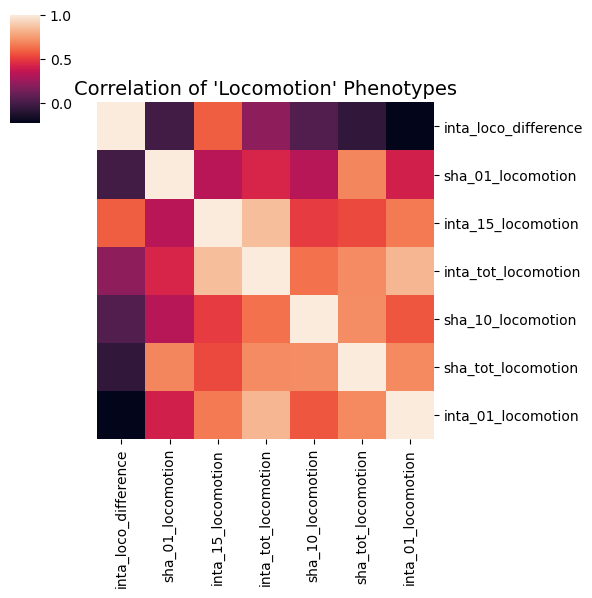

In [73]:
# calculate the correlation matrix
corr = locomotion.corr()

# plot the heatmap 
g = sns.clustermap(corr, figsize = (6,6), xticklabels=corr.columns, yticklabels=corr.columns)
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)
g.ax_heatmap.set_title("Correlation of 'Locomotion' Phenotypes", fontsize = 14)
plt.show()

## (4) Load in the two other "misc" datasets and just check their sizes

### misc2 ..

In [75]:
misc_2 = pd.read_csv("pheno_misc2.txt", sep = '\t')
misc_2.shape

(1674, 64)

In [80]:
list(misc_2.columns)

['rfid',
 'color',
 'ccp_box',
 'ccp_change_in_locomotor_activity',
 'ccp_change_in_time_on_cs',
 'ccp_post_test_time_on_cs',
 'ccp_trial_4_cocaine_dist_mm',
 'ccp_trial_4_saline_dist_mm',
 'ccp_trial_3_cocaine_dist_mm',
 'ccp_trial_3_saline_dist_mm',
 'ccp_trial_2_cocaine_dist_mm',
 'ccp_trial_2_saline_dist_mm',
 'ccp_trial_1_cocaine_dist_mm',
 'ccp_trial_1_saline_dist_mm',
 'ccp_pre_test_time_on_cs',
 'crf_ny_box',
 'crf_ny_number_reinforcers',
 'crf_ny_lever_presses',
 'crf_ny_inactive_responses',
 'crf_ny_active_responses',
 'crf_ny_active_inactive_ratio',
 'crf_ny_active_inactive_diff',
 'pavca_ny_box',
 'pavca_ny_latencyscore_d4d5',
 'pavca_ny_responsebias_d4d5',
 'pavca_ny_avglatmag_d4d5',
 'pavca_ny_avglatlev_d4d5',
 'pavca_ny_d5_prob_mag',
 'pavca_ny_d4_prob_mag',
 'pavca_ny_d3_prob_mag',
 'pavca_ny_d2_prob_mag',
 'pavca_ny_d1_prob_mag',
 'pavca_ny_probmag_d4d5',
 'pavca_ny_problever_d4d5',
 'pavca_ny_magazinencs_d4d5',
 'pavca_ny_magazinecs_d4d5',
 'pavca_ny_levercs_d4d5',
 '

In [81]:
misc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rfid                              1674 non-null   object 
 1   color                             1674 non-null   object 
 2   ccp_box                           1674 non-null   object 
 3   ccp_change_in_locomotor_activity  1672 non-null   float64
 4   ccp_change_in_time_on_cs          1672 non-null   float64
 5   ccp_post_test_time_on_cs          1672 non-null   float64
 6   ccp_trial_4_cocaine_dist_mm       1672 non-null   float64
 7   ccp_trial_4_saline_dist_mm        1672 non-null   float64
 8   ccp_trial_3_cocaine_dist_mm       1673 non-null   float64
 9   ccp_trial_3_saline_dist_mm        1673 non-null   float64
 10  ccp_trial_2_cocaine_dist_mm       1673 non-null   float64
 11  ccp_trial_2_saline_dist_mm        1673 non-null   float64
 12  ccp_tr

In [89]:
misc_2 = misc_2.set_index('rfid')
misc_2.head()

,color,ccp_box,ccp_change_in_locomotor_activity,ccp_change_in_time_on_cs,ccp_post_test_time_on_cs,ccp_trial_4_cocaine_dist_mm,ccp_trial_4_saline_dist_mm,ccp_trial_3_cocaine_dist_mm,ccp_trial_3_saline_dist_mm,ccp_trial_2_cocaine_dist_mm,...,pavca_ny_d3_prob_lev,pavca_ny_d2_prob_lev,pavca_ny_d1_prob_lev,pavca_ny_d5_avg_lev_lat,pavca_ny_d4_avg_lev_lat,pavca_ny_d3_avg_lev_lat,pavca_ny_d2_avg_lev_lat,pavca_ny_d1_avg_lev_lat,pavca_ny_d5_avg_mag_lat,pavca_ny_d4_avg_mag_lat
rfid,,,,,,,,,,,,,,,,,,,,,
00077E61F3,BLACK,box9,-2772.78,-215.22,488.35,20228.32,26435.84,47040.64,41080.85,48179.45,...,0.00,0.00,0.04,8.000,8.000,8.000,8.000,7.888,6.604,4.052
00077E6207,BROWN,box13,5837.25,360.59,769.30,28548.53,9373.82,38166.68,21264.35,30872.92,...,0.00,0.00,0.00,8.000,8.000,8.000,8.000,8.000,3.868,3.952
00077E6232,BLACKHOOD,box8,-3769.67,162.40,496.80,30173.24,10311.72,27361.56,10371.59,32209.66,...,0.00,0.00,0.08,7.568,8.000,8.000,8.000,7.728,6.312,3.604
00077E6239,BLACK,box1,-1767.01,847.11,1464.06,11068.60,17647.43,12689.55,15738.81,17074.85,...,0.48,0.16,0.16,4.936,5.012,6.188,7.552,7.564,5.428,5.744
00077E62D2,BLACK,box9,-9057.97,-204.97,161.23,27184.56,11181.42,34001.36,14356.38,29742.66,...,0.00,0.00,0.00,8.000,8.000,8.000,8.000,8.000,5.260,7.240


In [90]:
misc_2 = misc_2.select_dtypes(['number'])
misc_2.shape

(1674, 59)

In [91]:
misc_2 = misc_2.dropna()
misc_2.shape

(1497, 59)

### misc3 ...

In [99]:
misc_3 = pd.read_csv("pheno_misc3.txt", sep = '\t')
misc_3.shape

(878, 60)

In [100]:
list(misc_3.columns)

['rfid',
 'op_id',
 'soc_socialrs_sa',
 'soc_socialavgti',
 'soc_social_num_ti_1_5',
 'soc_social_num_ti_4_5',
 'soc_social_num_ti_7_5',
 'soc_social_num_ti_10_5',
 'soc_social_num_ti_13_5',
 'soc_social_num_ti_16_5',
 'soc_socialti_sa',
 'soc_midconrs_sa',
 'soc_midconavgti',
 'soc_midcon_num_ti_1_5',
 'soc_midcon_num_ti_4_5',
 'soc_midcon_num_ti_7_5',
 'soc_midcon_num_ti_10_5',
 'soc_midcon_num_ti_13_5',
 'soc_midcon_num_ti_16_5',
 'soc_midconti_sa',
 'soc_opconrs_sa',
 'soc_opconavgti',
 'soc_opcon_num_ti_1_5',
 'soc_opcon_num_ti_4_5',
 'soc_opcon_num_ti_7_5',
 'soc_opcon_num_ti_10_5',
 'soc_opcon_num_ti_13_5',
 'soc_opcon_num_ti_16_5',
 'soc_opconti_sa',
 'soc_totalrs_sa',
 'soc_avgtotalti',
 'soc_total_num_ti_1_5',
 'soc_total_num_ti_4_5',
 'soc_total_num_ti_7_5',
 'soc_total_num_ti_10_5',
 'soc_total_num_ti_13_5',
 'soc_total_num_ti_16_5',
 'soc_totalti_sa',
 'rt_trials_sa',
 'rt_meanrt_sa',
 'rt_devmedrt_sa',
 'rt_falsealarm_sa',
 'rt_peropfalsealarm_sa',
 'rt_pinit_sa',
 'rt_pe

In [101]:
misc_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rfid                    878 non-null    object 
 1   op_id                   878 non-null    object 
 2   soc_socialrs_sa         864 non-null    float64
 3   soc_socialavgti         864 non-null    float64
 4   soc_social_num_ti_1_5   862 non-null    float64
 5   soc_social_num_ti_4_5   864 non-null    float64
 6   soc_social_num_ti_7_5   858 non-null    float64
 7   soc_social_num_ti_10_5  843 non-null    float64
 8   soc_social_num_ti_13_5  833 non-null    float64
 9   soc_social_num_ti_16_5  779 non-null    float64
 10  soc_socialti_sa         864 non-null    float64
 11  soc_midconrs_sa         864 non-null    float64
 12  soc_midconavgti         864 non-null    float64
 13  soc_midcon_num_ti_1_5   863 non-null    float64
 14  soc_midcon_num_ti_4_5   861 non-null    fl

In [102]:
misc_3 = misc_3.set_index('rfid')
misc_3.head()

,op_id,soc_socialrs_sa,soc_socialavgti,soc_social_num_ti_1_5,soc_social_num_ti_4_5,soc_social_num_ti_7_5,soc_social_num_ti_10_5,soc_social_num_ti_13_5,soc_social_num_ti_16_5,soc_socialti_sa,...,lr_lt_act_sa,lr_lt_inact_sa,lr_lt_tot_sa,lr_px_pre_act_sa,lr_px_pre_inact_sa,lr_px_pre_tot_sa,dd_pcd600,dd_pcd1200,dd_pcd1800,dd_pcd2400
rfid,,,,,,,,,,,,,,,,,,,,,
CC1DCD17A6,R01,-0.333333,651.500000,4.0,5.0,5.0,7.0,6.0,7.0,0.537596,...,0.242616,-0.579710,0.191860,0.427778,-0.560000,-0.413194,6.01,12.01,18.01,24.01
CC1DCD1764,R02,-0.355856,724.200000,2.0,5.0,5.0,4.0,1.0,3.0,-0.413793,...,0.262821,-0.500000,-0.158228,-0.586538,0.429825,-0.502564,6.01,12.01,18.01,24.01
CC1DCD1776,R03,-0.536232,577.315790,4.0,2.0,7.0,3.0,2.0,1.0,0.595717,...,-0.572650,-0.500000,-0.548023,-0.671717,-0.547619,-0.504065,6.01,12.01,18.01,24.01
CC1DCD176C,R04,-0.533816,865.071429,5.0,6.0,6.0,5.0,5.0,1.0,-0.436016,...,-0.333333,-0.537879,-0.418239,-0.472222,-0.230159,-0.341880,6.01,12.01,18.01,24.01
CC1DCD1769,R05,-0.527778,692.368421,6.0,3.0,3.0,2.0,1.0,4.0,0.383263,...,-0.361905,-0.460317,-0.398810,-0.333333,-0.433333,-0.375000,6.01,12.01,18.01,24.01


In [103]:
misc_3 = misc_3.select_dtypes(['number'])
misc_3.shape

(878, 57)

In [104]:
misc_3 = misc_3.drop(columns = ['soc_social_num_ti_16_5', 'soc_midcon_num_ti_13_5', 'soc_midcon_num_ti_16_5', 'soc_opcon_num_ti_16_5'])
misc_3.shape

(878, 53)

In [105]:
misc_3 = misc_3.dropna()
misc_3.shape

(670, 53)

### NOTE: I think the misc datasets can be broken up 